## Projet de machine learning -- Code sur R

Tout d'abord, on va importer les librarires, importer et mettre en forme les données sur R

In [2]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet)
library(ggfortify)
library(pROC)
library(ROCR)
library(caret)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.2.0     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.5     ✔ tibble    3.3.0
✔ purrr     1.2.1     ✔ tidyr     1.3.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine



Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    layout


corrplot 0.95 loaded


Attachement du package : 'reshape2'


L'objet suivant est masqué depuis 'package:tidyr':

    smiths


Welcome! Want to learn more

In [3]:
data <- read.csv("healthcare_synthetic_data.csv")

head(data)
summary(data)

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
2,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
3,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
4,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
5,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0
6,PID-00006,52,0,159.6,60.3,23.7,134,92,225,155,48,103,0,0,1,1,4,8,0


  Patient_ID             Age            Gender         Height_cm    
 Length:15000       Min.   :25.00   Min.   :0.0000   Min.   :138.5  
 Class :character   1st Qu.:46.00   1st Qu.:0.0000   1st Qu.:158.5  
 Mode  :character   Median :55.00   Median :0.0000   Median :164.7  
                    Mean   :54.54   Mean   :0.4919   Mean   :165.3  
                    3rd Qu.:63.00   3rd Qu.:1.0000   3rd Qu.:172.0  
                    Max.   :85.00   Max.   :1.0000   Max.   :198.1  
   Weight_kg           BMI         Systolic_BP     Diastolic_BP   
 Min.   : 33.70   Min.   :14.50   Min.   : 90.0   Min.   : 60.00  
 1st Qu.: 65.20   1st Qu.:24.50   1st Qu.:127.0   1st Qu.: 85.00  
 Median : 73.90   Median :27.20   Median :135.0   Median : 91.00  
 Mean   : 75.25   Mean   :27.45   Mean   :135.1   Mean   : 90.54  
 3rd Qu.: 83.90   3rd Qu.:30.00   3rd Qu.:143.0   3rd Qu.: 96.00  
 Max.   :150.10   Max.   :46.10   Max.   :182.0   Max.   :120.00  
 Cholesterol_Total Cholesterol_LDL Cholesterol_H

On convertit les variables quanlitatives en facteurs

In [4]:
data[,"Smoking_Status"] <- as.factor(data[, "Smoking_Status"])
data[,"Alcohol_Consumption"] <- as.factor(data[, "Alcohol_Consumption"])
data[,"Physical_Activity_Level"] <- as.factor(data[, "Physical_Activity_Level"])
data[,"Family_History"] <- as.factor(data[, "Family_History"])
data[,"Heart_Disease_Risk"] <- as.factor(data[, "Heart_Disease_Risk"])
data[,"Gender"] <- as.factor(data[, "Gender"])
data <- data %>%
  mutate(across(where(is.character), as.factor))

summary(data)

     Patient_ID         Age        Gender     Height_cm       Weight_kg     
 PID-00001:    1   Min.   :25.00   0:7622   Min.   :138.5   Min.   : 33.70  
 PID-00002:    1   1st Qu.:46.00   1:7378   1st Qu.:158.5   1st Qu.: 65.20  
 PID-00003:    1   Median :55.00            Median :164.7   Median : 73.90  
 PID-00004:    1   Mean   :54.54            Mean   :165.3   Mean   : 75.25  
 PID-00005:    1   3rd Qu.:63.00            3rd Qu.:172.0   3rd Qu.: 83.90  
 PID-00006:    1   Max.   :85.00            Max.   :198.1   Max.   :150.10  
 (Other)  :14994                                                            
      BMI         Systolic_BP     Diastolic_BP    Cholesterol_Total
 Min.   :14.50   Min.   : 90.0   Min.   : 60.00   Min.   :127.0    
 1st Qu.:24.50   1st Qu.:127.0   1st Qu.: 85.00   1st Qu.:201.0    
 Median :27.20   Median :135.0   Median : 91.00   Median :216.0    
 Mean   :27.45   Mean   :135.1   Mean   : 90.54   Mean   :216.2    
 3rd Qu.:30.00   3rd Qu.:143.0   3rd Qu.: 96

We are going to do a uni-dimensional analysis of the data. This means that we will be plotting graph of the different variable and look at their shape. We have a preference for data that look like gaussian data. We can do transformations of data to give it the shape of gaussian data. 

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


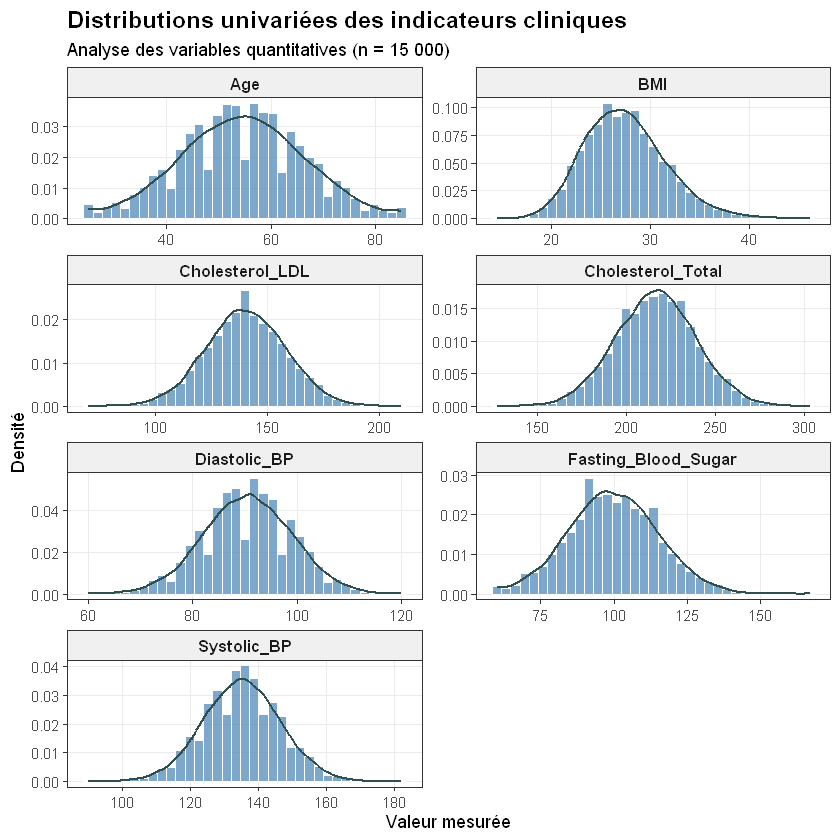

In [5]:
cols_quantitatives <- c("Age", "BMI", "Systolic_BP", "Diastolic_BP", 
                        "Cholesterol_Total", "Cholesterol_LDL", "Fasting_Blood_Sugar")

data_long <- data %>%
  select(all_of(cols_quantitatives)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Valeur")

# 2. Création du graphique
p <- ggplot(data_long, aes(x = Valeur)) +
  # Histogramme avec une couleur sobre (Steelblue) et bordures blanches
  geom_histogram(aes(y = ..density..), bins = 35, fill = "#4682B4", color = "white", alpha = 0.7) +
  # Courbe de densité plus fine et sombre
  geom_density(color = "#2f4f4f", size = 0.8) +
  # Grilles séparées par variable
  
  facet_wrap(~ Variable, scales = "free", ncol = 2) + 
  labs(title = "Distributions univariées des indicateurs cliniques",
       subtitle = "Analyse des variables quantitatives (n = 15 000)",
       x = "Valeur mesurée",
       y = "Densité") +
  # Thème très épuré
  theme_bw() + 
  theme(
    strip.background = element_rect(fill = "#F0F0F0"), # Fond des titres de facettes gris clair
    strip.text = element_text(face = "bold", size = 10),
    panel.grid.minor = element_blank(),
    plot.title = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 11)
  )

# 3. Affichage
print(p)

Les transformations de variables qu'il faut faire :

BMI et Fasting_Blood_Sugar ont l'air d'être un peu à droite... Il faudrait prendre le log pour passer d'une distrib exponentielle a une distrib normale

On va essayer de faire cela


In [6]:
data <- data %>%
  mutate(
    Log_BMI = log(BMI),
    Log_Fasting_BS = log(Fasting_Blood_Sugar)
  )

On affiche maintenant les deux nouvelles variables transformées

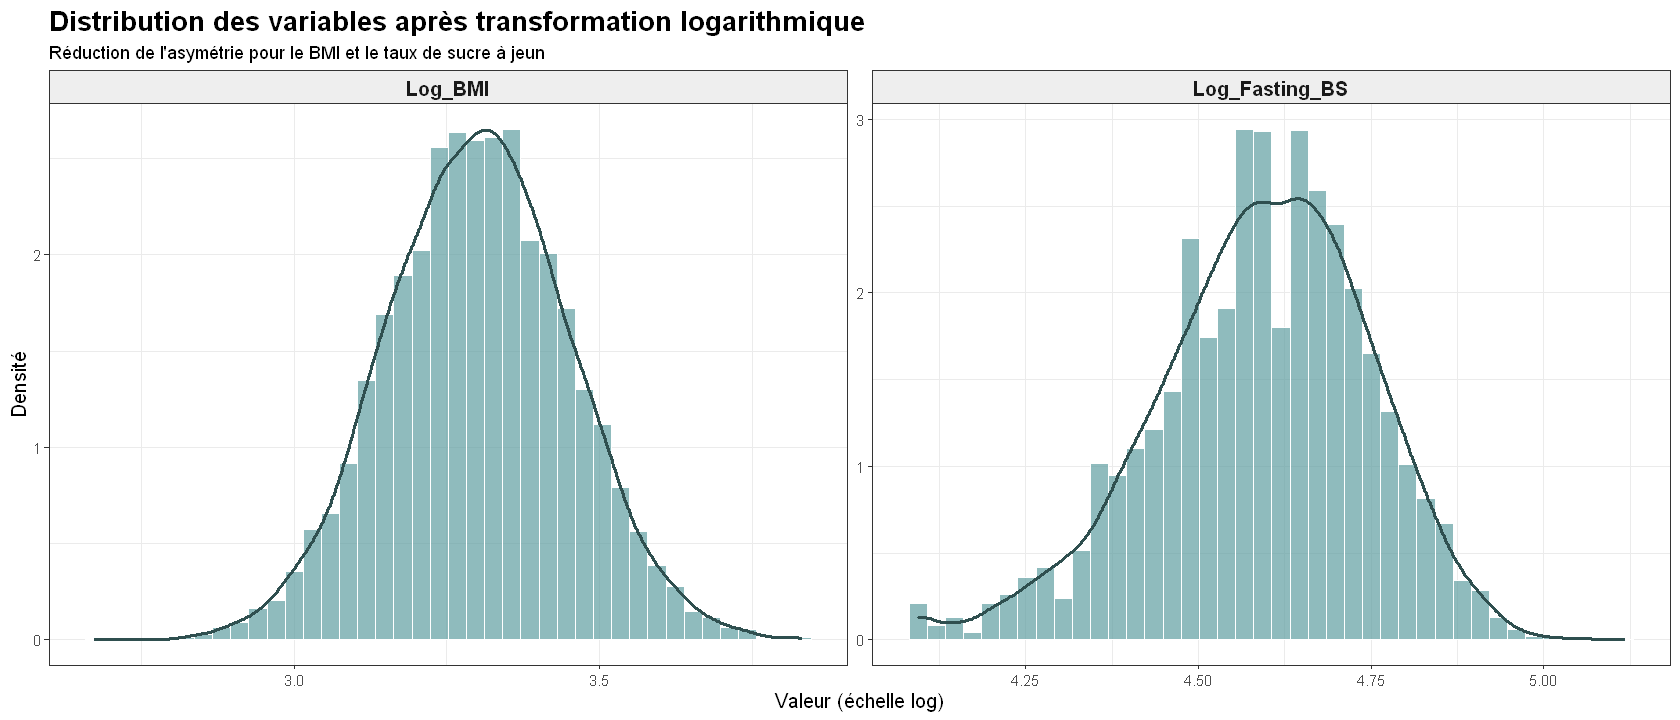

In [7]:
# 1. Sélection des nouvelles variables uniquement
cols_log <- c("Log_BMI", "Log_Fasting_BS")

data_log_long <- data %>%
  select(all_of(cols_log)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Valeur")

# 2. Configuration de la taille dans le notebook VS Code
options(repr.plot.width = 14, repr.plot.height = 6)

# 3. Affichage
p_log <- ggplot(data_log_long, aes(x = Valeur)) +
  geom_histogram(aes(y = ..density..), bins = 40, fill = "#5F9EA0", color = "white", alpha = 0.7) +
  geom_density(color = "#2F4F4F", size = 1) +
  facet_wrap(~ Variable, scales = "free", ncol = 2) + 
  labs(title = "Distribution des variables après transformation logarithmique",
       subtitle = "Réduction de l'asymétrie pour le BMI et le taux de sucre à jeun",
       x = "Valeur (échelle log)",
       y = "Densité") +
  theme_bw() +
  theme(
    strip.background = element_rect(fill = "#EEEEEE"),
    strip.text = element_text(face = "bold", size = 12),
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12)
  )

print(p_log)

En ce qui concerne l'analyse exploratoire, nous préférons la faire en Python. Nous nous contentons ici de la transformation des données pour pouvoir poursuivre notre analyse que nous allons, elle, effectuer simultanément dans les deux langages.

Nous allons maintenant séparer nos données entre données d'entraînement et données de test.

In [8]:
# Fixer la graine (seed) pour la reproductibilité (crucial pour Git)
set.seed(42)

# Créer l'index pour 80% d'entraînement et 20% de test
# On stratifie sur Heart_Disease_Risk pour garder les mêmes proportions de classes
trainIndex <- createDataPartition(data$Heart_Disease_Risk, p = .8, 
                                  list = FALSE, 
                                  times = 1)

# Division
train_data <- data[trainIndex,]
test_data  <- data[-trainIndex,]

#J'enleve le patient id parce que ce n'est pas une variable qui explique quoi que ce soit
train_data <- train_data %>% select(-Patient_ID)
test_data  <- test_data %>% select(-Patient_ID)

# Vérification des dimensions
print(dim(train_data))
print(dim(test_data))

[1] 12000    20
[1] 3000   20


Maintenant que nos données sont prêtes, dans un premier temps on va essayer de tester le modèle linéaire simple, sans sélection de variable

Puisqu'on veut prédire une variable qualitative, on va utiliser la regression logistique, et fixer un seuil toussa toussa

In [9]:
# 1. Entraînement du modèle sur le set d'entraînement
model_log_R <- glm(Heart_Disease_Risk ~ ., 
                   data = train_data, 
                   family = "binomial")

# 2. Résumé du modèle pour voir la significativité des coefficients
summary(model_log_R)

# 3. Prédiction sur le set de test
# type="response" donne des probabilités entre 0 et 1
pred_probs <- predict(model_log_R, newdata = test_data, type = "response")

# 4. Conversion en classes (seuil à 0.5)
pred_classes <- ifelse(pred_probs > 0.5, 1, 0)

# 5. Évaluation (Matrice de confusion)
confusionMatrix(as.factor(pred_classes), as.factor(test_data$Heart_Disease_Risk))


Call:
glm(formula = Heart_Disease_Risk ~ ., family = "binomial", data = train_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.7434419  6.2282545   0.119   0.9050    
Age                       0.0203445  0.0022331   9.110  < 2e-16 ***
Gender1                  -0.0124503  0.0648494  -0.192   0.8478    
Height_cm                -0.0101324  0.0158289  -0.640   0.5221    
Weight_kg                 0.0109811  0.0168570   0.651   0.5148    
BMI                       0.0895274  0.0680071   1.316   0.1880    
Systolic_BP               0.0303633  0.0034319   8.847  < 2e-16 ***
Diastolic_BP             -0.0004399  0.0043773  -0.101   0.9199    
Cholesterol_Total        -0.0019321  0.0017957  -1.076   0.2820    
Cholesterol_LDL           0.0119122  0.0021774   5.471 4.48e-08 ***
Cholesterol_HDL          -0.0082928  0.0043710  -1.897   0.0578 .  
Fasting_Blood_Sugar       0.0313316  0.0135318   2.315   0.0206 *  
Smoking_Status1 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1365  477
         1  327  831
                                          
               Accuracy : 0.732           
                 95% CI : (0.7158, 0.7478)
    No Information Rate : 0.564           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4479          
                                          
 Mcnemar's Test P-Value : 1.482e-07       
                                          
            Sensitivity : 0.8067          
            Specificity : 0.6353          
         Pos Pred Value : 0.7410          
         Neg Pred Value : 0.7176          
             Prevalence : 0.5640          
         Detection Rate : 0.4550          
   Detection Prevalence : 0.6140          
      Balanced Accuracy : 0.7210          
                                          
       'Positive' Class : 0               
                        

Cette modélisation la plus simple a un taux de succès de 73%, ce qui n'est pas non plus incroyable

On va essayer une modélisation en prenant en compte les interactions entre les variables deux à deux, mais on risque de faire de l'overfitting

In [10]:
# 1. Entraînement du modèle sur le set d'entraînement
model_log_R <- glm(Heart_Disease_Risk ~ .*., 
                   data = train_data, 
                   family = "binomial")

# 2. Résumé du modèle pour voir la significativité des coefficients
summary(model_log_R)

# 3. Prédiction sur le set de test
# type="response" donne des probabilités entre 0 et 1
pred_probs <- predict(model_log_R, newdata = test_data, type = "response")

# 4. Conversion en classes (seuil à 0.5)
pred_classes <- ifelse(pred_probs > 0.5, 1, 0)

# 5. Évaluation (Matrice de confusion)
confusionMatrix(as.factor(pred_classes), as.factor(test_data$Heart_Disease_Risk))


Call:
glm(formula = Heart_Disease_Risk ~ . * ., family = "binomial", 
    data = train_data)

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    2.322e+03  1.024e+03   2.268
Age                                           -5.123e-01  6.743e-01  -0.760
Gender1                                        1.073e+01  2.169e+01   0.495
Height_cm                                     -9.627e+00  3.790e+00  -2.540
Weight_kg                                      1.678e+01  4.988e+00   3.364
BMI                                           -3.628e+01  3.136e+01  -1.157
Systolic_BP                                    2.059e-01  1.027e+00   0.201
Diastolic_BP                                  -3.742e-01  1.320e+00  -0.284
Cholesterol_Total                             -9.634e-02  5.595e-01  -0.172
Cholesterol_LDL                                9.778e-02  6.718e-01   0.146
Cholesterol_HDL                               -5.158e-0

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1358  477
         1  334  831
                                          
               Accuracy : 0.7297          
                 95% CI : (0.7134, 0.7455)
    No Information Rate : 0.564           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4434          
                                          
 Mcnemar's Test P-Value : 6.155e-07       
                                          
            Sensitivity : 0.8026          
            Specificity : 0.6353          
         Pos Pred Value : 0.7401          
         Neg Pred Value : 0.7133          
             Prevalence : 0.5640          
         Detection Rate : 0.4527          
   Detection Prevalence : 0.6117          
      Balanced Accuracy : 0.7190          
                                          
       'Positive' Class : 0               
                        

Le pourcentage de réussite est en effet maintenant légèrement inférieur, et on peut expliquer cela par de l'overfitting au vu du nombre conséquent de variables qui ne semblent pas avoir une significativité importante

Nous allons donc essayer de faire une regression logistique avec une pénalisation L1 (Lasso), pour réduire le nombre de variables qut l'on prend en compte

In [11]:
library(glmnet)

# 1. Préparation des données (on transforme les facteurs en colonnes numériques "dummy")
X_train <- model.matrix(Heart_Disease_Risk ~ . - 1, data = train_data) # -1 pour enlever l'intercepte automatique
y_train <- train_data$Heart_Disease_Risk

X_test <- model.matrix(Heart_Disease_Risk ~ . - 1, data = test_data)

# 2. Trouver le meilleur paramètre de régularisation (lambda) par validation croisée
cv_lasso <- cv.glmnet(X_train, y_train, family = "binomial", alpha = 1) # alpha = 1 pour Lasso

# 3. Entraîner le modèle final avec le meilleur lambda
model_lasso <- glmnet(X_train, y_train, family = "binomial", alpha = 1, lambda = cv_lasso$lambda.min)

# 4. Voir quels coefficients ont été conservés
coef(model_lasso)

24 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)              -9.719365758
Age                       0.019250848
Gender0                   .          
Gender1                   .          
Height_cm                 .          
Weight_kg                 .          
BMI                       0.040489272
Systolic_BP               0.029431090
Diastolic_BP              .          
Cholesterol_Total         .          
Cholesterol_LDL           0.009764953
Cholesterol_HDL          -0.006913385
Fasting_Blood_Sugar       0.020022643
Smoking_Status1           1.949220725
Alcohol_Consumption1     -0.069121112
Alcohol_Consumption2     -0.012376979
Physical_Activity_Level1 -0.522797787
Physical_Activity_Level2 -1.009771161
Physical_Activity_Level3 -1.470460247
Family_History1           1.445896653
Stress_Level              0.102689855
Sleep_Hours              -0.073988547
Log_BMI                   .          
Log_Fasting_BS            .          

On peut afficher la courbe de régularisation de ce modèle, qui montre quels paramètres sont annulés en premier

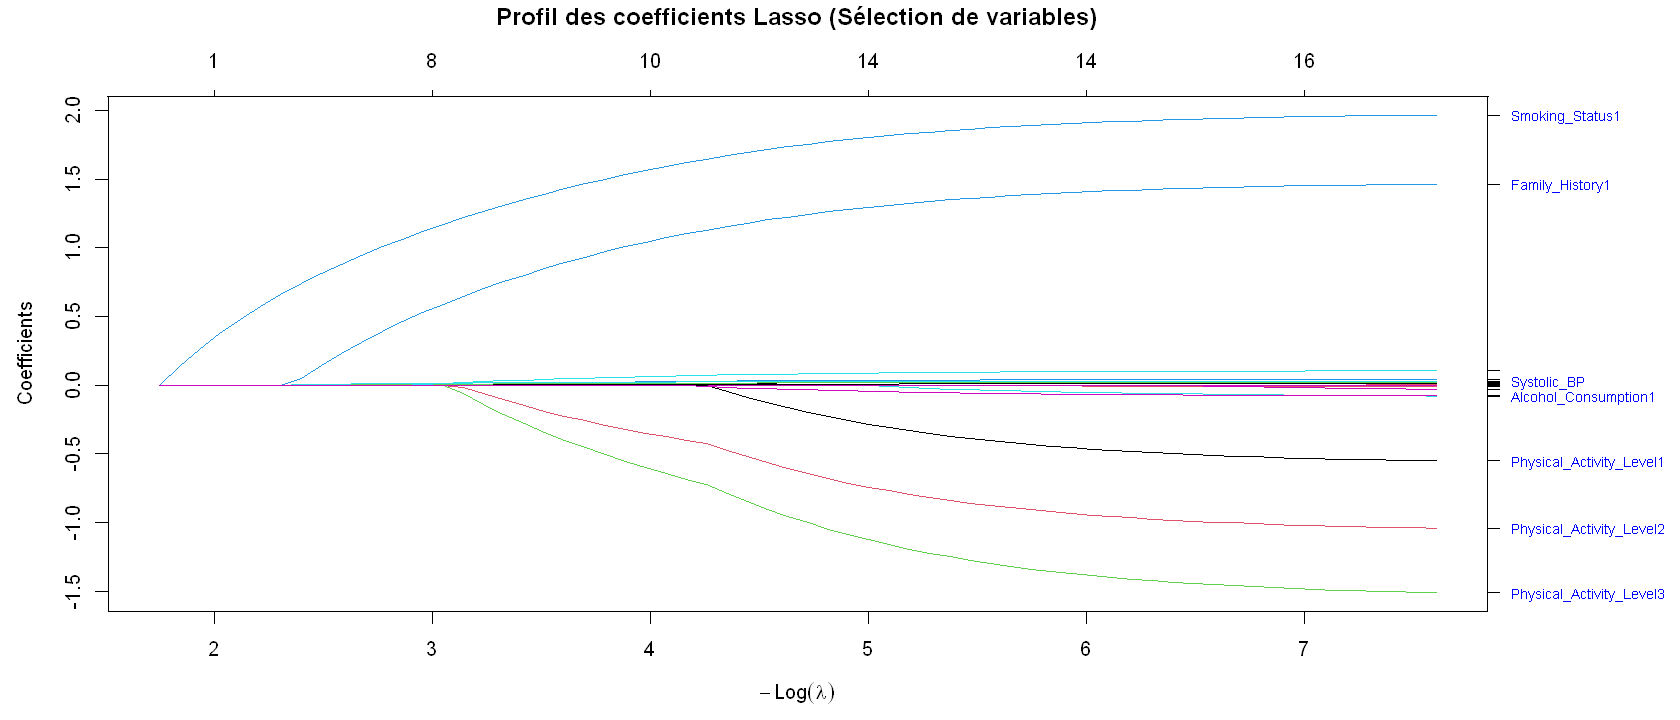

In [18]:
# On augmente les marges à droite pour laisser de la place à la légende
par(mar=c(4.5, 4.5, 4, 8)) 

# 1. Tracer le graphique sans légende automatique
plot(cv_lasso$glmnet.fit, xvar = "lambda", label = FALSE)

# 2. Récupérer les positions finales des coefficients (à gauche du graphique)
vnat <- coef(cv_lasso$glmnet.fit)
vnat <- vnat[-1, adj=0] # On enlève l'intercept
vnat <- vnat[, ncol(vnat)] # On prend la dernière colonne (lambda le plus petit)

# 3. Ajouter les noms des variables à droite
axis(4, at = vnat, labels = names(vnat), las = 1, cex.axis = 0.7, col.axis = "blue")

# 4. Ajouter la ligne du meilleur lambda
abline(v = log(cv_lasso$lambda.min), col = "red", lty = 2)
title("Profil des coefficients Lasso (Sélection de variables)", line = 3)

On peut maintenant regarder les résultats de ce modèle sur le jeu de test

In [13]:
# 1. Prédiction des probabilités
pred_probs_lasso <- predict(model_lasso, newx = X_test, type = "response")

# 2. Conversion en classes (seuil 0.5)
pred_classes_lasso <- ifelse(pred_probs_lasso > 0.5, 1, 0)

# 3. Matrice de confusion et Taux de réussite (Accuracy)
# On s'assure que ce sont des facteurs avec les mêmes niveaux
cm_lasso <- confusionMatrix(as.factor(pred_classes_lasso), 
                            as.factor(test_data$Heart_Disease_Risk))

print(cm_lasso)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1368  477
         1  324  831
                                          
               Accuracy : 0.733           
                 95% CI : (0.7168, 0.7488)
    No Information Rate : 0.564           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4498          
                                          
 Mcnemar's Test P-Value : 7.845e-08       
                                          
            Sensitivity : 0.8085          
            Specificity : 0.6353          
         Pos Pred Value : 0.7415          
         Neg Pred Value : 0.7195          
             Prevalence : 0.5640          
         Detection Rate : 0.4560          
   Detection Prevalence : 0.6150          
      Balanced Accuracy : 0.7219          
                                          
       'Positive' Class : 0               
                        

Le taux de réussite est légèrement supérieur, avec moins de variables. Il faut aussi se soucier de la sensibilité du test (pour éviter les daux négatifs par exemple, qui sont plus grave que les faux positifs)

On essaye maintenant avec Ridge

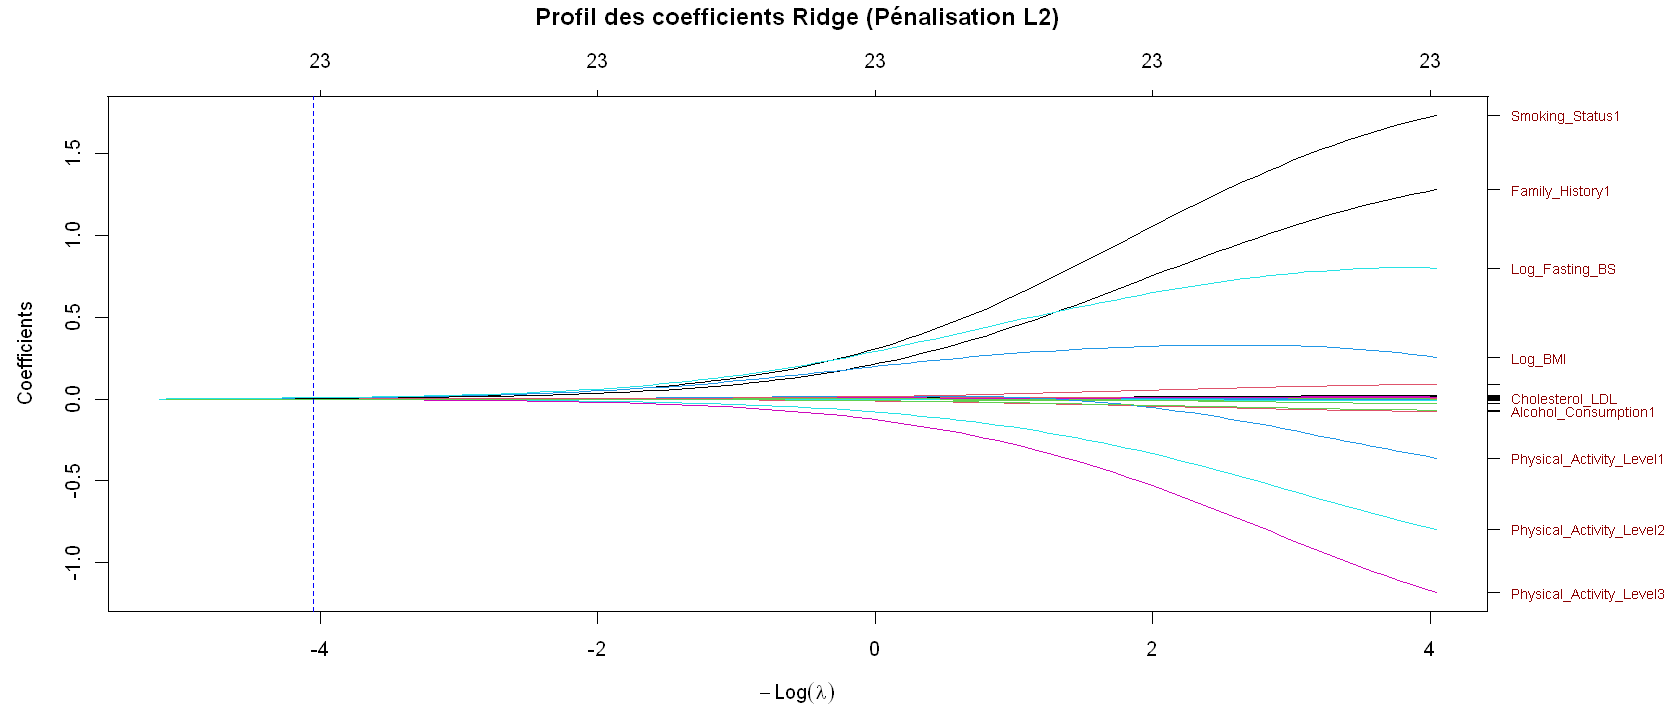

In [19]:
# 1. Validation croisée pour trouver le meilleur lambda (Ridge)
cv_ridge <- cv.glmnet(X_train, y_train, family = "binomial", alpha = 0)

# 2. Entraînement du modèle final avec le lambda optimal
model_ridge <- glmnet(X_train, y_train, family = "binomial", alpha = 0, lambda = cv_ridge$lambda.min)

# 3. Affichage de la courbe de régularisation avec légende
par(mar=c(4.5, 4.5, 4, 8)) # Ajustement des marges pour la légende
plot(cv_ridge$glmnet.fit, xvar = "lambda", label = FALSE)

# Ajout des noms des variables sur la droite
vnat_ridge <- coef(cv_ridge$glmnet.fit)
vnat_ridge <- vnat_ridge[-1, ] # On enlève l'intercept
vnat_ridge <- vnat_ridge[, ncol(vnat_ridge)]
axis(4, at = vnat_ridge, labels = names(vnat_ridge), las = 1, cex.axis = 0.7, col.axis = "darkred")

abline(v = log(cv_ridge$lambda.min), col = "blue", lty = 2)
title("Profil des coefficients Ridge (Pénalisation L2)", line = 3)

Maintenant, on évalue le modèle en terme d'accuracy

In [20]:
# Prédictions sur le set de test
pred_probs_ridge <- predict(model_ridge, newx = X_test, type = "response")
pred_classes_ridge <- ifelse(pred_probs_ridge > 0.5, 1, 0)

# Matrice de confusion
cm_ridge <- confusionMatrix(as.factor(pred_classes_ridge), 
                             as.factor(test_data$Heart_Disease_Risk),
                             positive = "1")

print(cm_ridge$table)
cat("\nPrécision Ridge :", round(cm_ridge$overall['Accuracy'] * 100, 2), "%\n")

          Reference
Prediction    0    1
         0 1375  490
         1  317  818

Précision Ridge : 73.1 %


Eh bah ridge c'est nul